# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

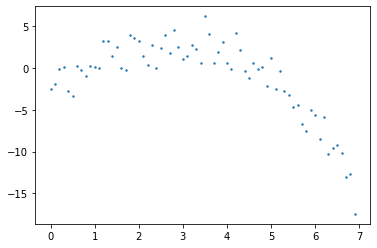

In [3]:
import matplotlib.pyplot as plt

x = xy_data[:,0]
y = xy_data[:,1]

plt.scatter(x,y,s=2)
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [20]:
def polyreg(data_matrix, k):
    """Polynomial fit using Least Squares
    data_matrix: N x 2 array
    k: degree of polynomial
    NOTE: beta-vector is calculated as: (X.T X )-1 X.T y
    """
    assert data_matrix.shape[1] == 2
    N = data_matrix.shape[0]
    degree = N-1 if k > N else k    # Ensure degree of polynomial is less than number of data points
    # print(f"Degree of polynomial: {degree}")

    x = data_matrix[:,0]    # Get x values
    y = data_matrix[:,1]     # y
    X = np.column_stack([x**i for i in range(k+1)]) # Create X column matrix
    
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)    # Least squares
    fit = X.dot(beta)                                   # Fit
    beta = beta if k <= N else np.append(beta, [0 for _ in range(k - N + 1)])   # Add trailing 0s to beta if k <= N

    return beta, fit, y-fit
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    

Use the tests below to check the outputs of the function you have written:

In [21]:
# Some tests to make sure your  function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

In [22]:
# Check for k > 3
n = len(test_matrix)
res = polyreg(test_matrix, k=19)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

k: 2	SSE: 172	R2: 0.888
k: 3	SSE: 152	R2: 0.901
k: 4	SSE: 151	R2: 0.901


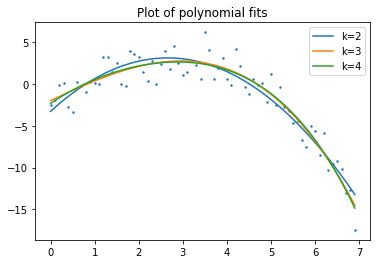

In [23]:
# Plot points
plt.scatter(x,y,s=2)

SSE_0 = len(y) * np.var(y) # N * Variance

# Plot fits
for k in range(2,5):
    beta, fit, resid = polyreg(xy_data, k)
    plt.plot(x, fit, label=f"k={k}")
    SSE_k = sum(resid**2)
    print(f"k: {k}\tSSE: {SSE_k:.3g}\tR2: {1 - SSE_k/SSE_0:.3g}")
plt.legend()
plt.title("Plot of polynomial fits")
plt.show()

 #### State which model you choose and briefly justify your choice.
 
Without knowing what the data is about, it is difficult tell what level of precision is required. A cubic seems to give the best middle groudn in terms of computation vs accuracy as it has R2 > 0.9. Interestingly, k=3 gives a better guassian distribution of residuals

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

In [27]:
from scipy.stats import norm

Residuals: Mean=0.000, Var=2.177


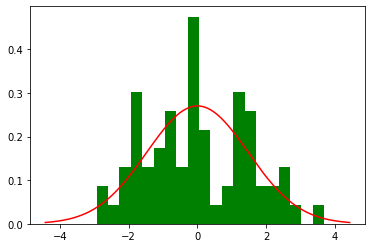

In [32]:
# Get fit with k = 3
beta, fit, resid = polyreg(xy_data, k=3)
print(f'Residuals: Mean={np.mean(resid):.3f}, Var={np.var(resid):.3f}')

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid, bins=20, density=True, facecolor='green')

# Plot Gaussian pdf with same mean and variance as the residuals
res_stdev = np.std(resid)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()